Processed depth maps from scene_points000030.tiff
Left shape: (1024, 1280), Right shape: (1024, 1280)


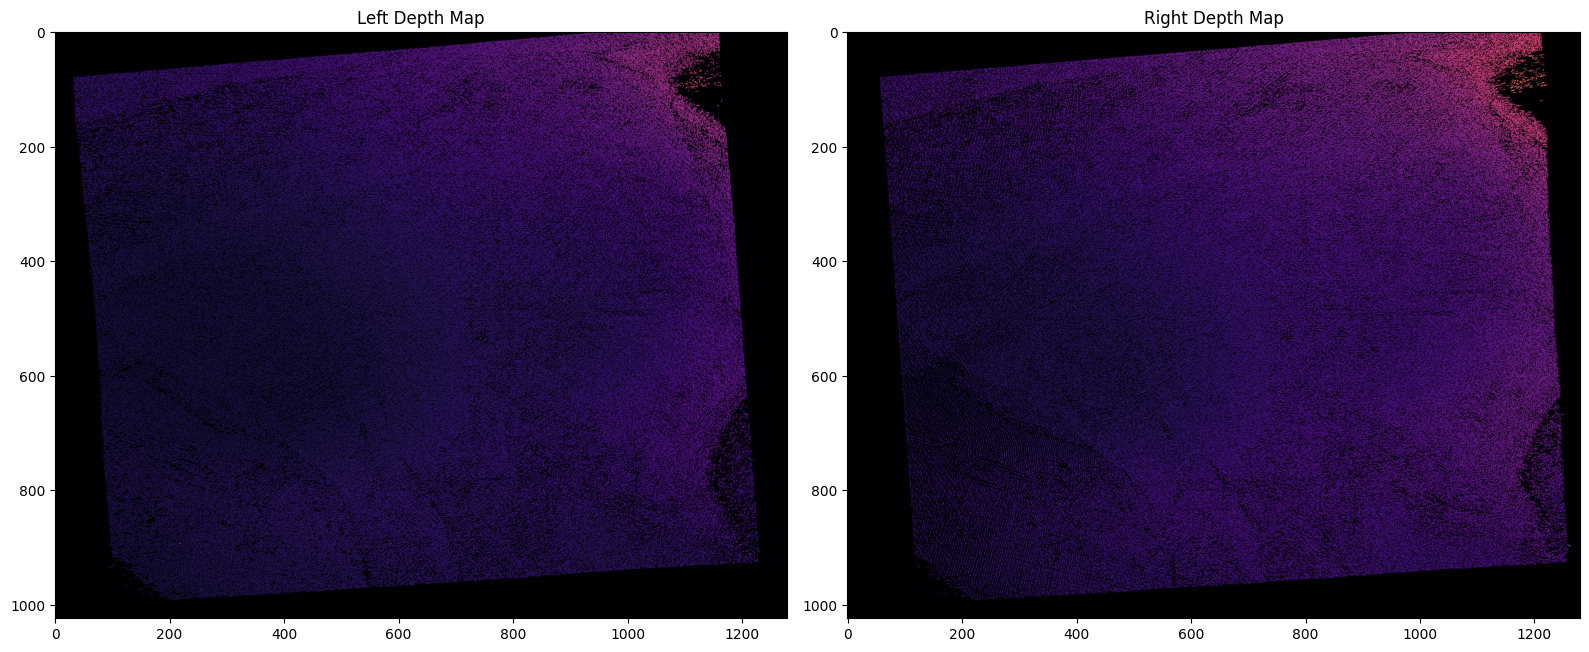

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import os

dummy_filename = "scene_points000030.tiff"

def tiff_reader(tiff_file):
    """Read and process TIFF depth maps."""
    raw = tiff.imread(tiff_file)

    split_height = raw.shape[0] // 2
    img_l, img_r = raw[:split_height], raw[split_height:]

    def process_depth(z):
        z = z.astype(np.float32)
        z[(z > 500) | (z < 20)] = 0

        z_processed = np.copy(z)
        valid_z = z_processed[z_processed != 0]
        if valid_z.size > 0:
            min_val, max_val = valid_z.min(), valid_z.max()
            if max_val > min_val:
                z_processed[z_processed != 0] = ((z_processed[z_processed != 0] - min_val) /
                                                (max_val - min_val) * 255)
            else:
                z_processed[z_processed != 0] = 127
        return z_processed.astype(np.uint8)

    return process_depth(img_l[:, :, 2]), process_depth(img_r[:, :, 2])


depth_map_l, depth_map_r = tiff_reader(dummy_filename)
print(f"Processed depth maps from {dummy_filename}")
print(f"Left shape: {depth_map_l.shape}, Right shape: {depth_map_r.shape}")

# Visualize results
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(depth_map_l, cmap='magma')
plt.title('Left Depth Map')

plt.subplot(1, 2, 2)
plt.imshow(depth_map_r, cmap='magma')
plt.title('Right Depth Map')

plt.tight_layout()
plt.show()